<a href="https://colab.research.google.com/github/draglar/car-sharing-and-recharging/blob/main/Ian_Muigai_Dsc6_Core_week_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have been tasked to understand electric car usage by solving for another research question therefore we need to perform hypothesis testing with regards to the claim that we will have made.

Steps to follow when solving the research question
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Plot appropriate univariate and bivariate summaries recording our observations.
* Implement the solution by performing hypothesis testing.


###Importing the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime

In [3]:
autolib=pd.read_csv('autolib_daily_events_postal_code (1).csv')
descript=pd.read_excel('columns_explanation (1).xlsx')

###reading the data

In [5]:
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
descript

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [7]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


###Cleaning the dataset

####renaming columns

In [8]:
autolib['date']=pd.to_datetime(autolib['date'])

In [9]:
autolib['date']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: date, Length: 16085, dtype: datetime64[ns]

In [10]:
autolib.date.map(lambda x: x.year).unique()

array([2018])

In [11]:
autolib.date.map(lambda x: x.month).unique()

array([1, 2, 3, 4, 5, 6])

months: 0 -->January,...,6 -->June

#### validity

In [12]:
autolib['day']=autolib.date.map(lambda x: x.day)
autolib['month']=autolib.date.map(lambda x: x.month)
autolib.drop('date',axis=1,inplace=True)


In [13]:
autolib['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [14]:
autolib['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [15]:
autolib['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [16]:
autolib['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [17]:
autolib['BlueCars_taken_sum'].unique()

array([ 110,   98,  138,  104,  114,  187,  180,   84,   81,   88,  125,
        126,  224,  193,  107,  116,  118,  122,  130,  217,  143,  123,
        112,  108,  145,  216,  190,   83,  103,  146,  199,  186,  121,
        113,  109,  207,  160,  115,   94,   99,  119,  176,  157,   85,
        100,  135,    8,   92,  127,  136,  192,  168,  102,  134,  197,
        173,  131,  196,  150,  156,  231,  105,  219,  179,  124,  188,
        139,   97,  120,  159,  147,  151,  129,  152,  142,  141,  202,
        175,   96,  133,  254,  137,  185,  203,    6,  166,  165,  243,
        264,  213,  164,  163,  191,  276,  210,  183,  148,  270,  128,
        280,  178,  153,  158,  259,  161,  240,   12,  181,  140,  263,
        167,  177,  250,  208,  171,  266,  155,  247,  154,  184,  293,
        228,  182,  144,  218,  162,  239,  200,  170,  174,  172,  245,
          5,  195,  237,  331,  283,  212,  211,  380,  356,  233,  220,
        238,  384,  313,  229,  221,  201,  350,  3

In [18]:
autolib['BlueCars_returned_sum'].unique()

array([ 103,   94,  139,  104,  117,  185,  180,   83,   84,   85,  125,
        127,  223,  193,  107,  116,  118,  122,  130,  217,  150,  113,
        146,  218,  189,   81,  110,  147,  204,  121,   99,  112,  109,
        207,  165,  111,   93,  119,  176,  158,   86,   98,  135,    9,
         91,  131,  137,  138,  208,  177,  124,  101,  145,  203,  169,
         96,  136,  142,  196,  154,  100,   97,  144,  128,  179,  151,
        115,  232,  105,  219,  143,  190,  102,  159,  155,  156,  120,
        141,  201,  133,  253,  199,   95,  108,  188,  126,  206,  174,
          7,  244,  197,  153,  264,  148,  164,  277,  213,  149,  175,
        270,  198,  280,  161,  178,  152,  160,  257,  205,  240,  123,
        157,   12,  265,  186,  173,  140,  171,  167,  255,  209,  170,
        266,  248,  243,  183,  292,  222,  134,  236,  132,  181,  172,
        184,  168,  162,  237,  163,  233,  202,  283,  192,  252,  211,
          6,  250,  187,  229,  249,  338,  293,  2

In [19]:
autolib['Slots_freed_sum'].unique()

array([ 22,  23,  27,  25,  18,  38,  34,  14,  15,  11,  19,  16,  21,
        17,  41,  24,  20,  35,  36,  32,  13,  28,  12,  26,   0,  48,
        30,  29,  31,  47,  33,  40,  37,   9,  10,  43,  44,  49,  39,
        42,  45,  51,  46,  59,  64,  56,  52,   1,  50,  95,  84,  83,
        81,  58,  61,  67, 101,  86,  63,  97,  60,  57,  65,  80,  79,
        77,  54,  85,  75,  73,  55,   3,  62,  82,  71,  69,  74,  89,
        91, 109,  70,  76,  72,  68,  78,  53,  66,  87,   2,   5, 120,
       111,  92, 110,  88, 103, 142, 115, 105, 113, 121,  96,  90, 134,
       140, 130,  94,  99, 128, 100, 129,  98, 118, 106, 119, 117, 102,
       107,  93, 135, 104, 122, 133, 108, 112, 116, 123, 136, 126,   6,
       114, 132, 177, 167, 125, 124, 131, 143, 139, 137, 153, 180, 157,
       162, 152, 151, 149, 156, 145, 173, 147, 211, 127, 141, 161, 144,
       163, 138, 171, 158, 148, 168, 154, 166, 150, 170, 146, 165, 178,
       174, 175, 176, 181, 190, 160, 184, 205, 253, 252, 155, 19

In [20]:
autolib['Slots_taken_sum'].unique()

array([ 20,  22,  27,  21,  35,  34,  15,  13,  38,  19,  39,  25,  14,
         9,  37,  36,  30,  16,  11,  28,  33,  18,  12,   0,  31,  23,
        26,  50,  17,  40,  24,  48,  32,   8,  29,  42,  43,  49,  45,
        41,  44,  52,  59,  46,  65,  47,  57,  51,   1,  97,  87,  54,
        84,  83,  60,  69, 103,  58,  62,  92,  67,  78,  82,  77,  53,
        88,  72,  66,  99,  64,  55,  75, 113,  63,  74,  71,  89,  68,
        81,  73,  70,  61,  79,  56,  76,  86,   2, 118, 108, 107, 144,
       114,  93, 105, 106, 115, 122,  90,  80,  98,  85, 139, 136, 128,
        94, 126,  95,   4, 130, 102,  96, 129, 138, 111, 124, 101, 109,
       116, 110, 134,  91, 119, 137, 100,   3, 104, 112,   6, 177, 125,
       120, 123, 131, 135, 140, 132, 155, 182, 154, 164, 121, 151, 157,
       147, 117, 153, 160, 141, 172, 161,   5, 213, 145, 143, 162, 127,
       148, 169, 149, 171, 167, 163, 166, 133, 158, 159, 150, 174, 173,
       178, 152,   7, 176, 179, 165, 180, 142, 188, 185, 183,  1

In [21]:
autolib['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [22]:
autolib['month'].unique()

array([1, 2, 3, 4, 5, 6])

#### completemess

In [23]:
autolib.shape

(16085, 14)

In [24]:
autolib.isna().sum()

Postal code               0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
day                       0
month                     0
dtype: int64

There were no null values in the datadset

####consistency

In [25]:
autolib.duplicated().sum()

0

There were no duplicated items

#### removing outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

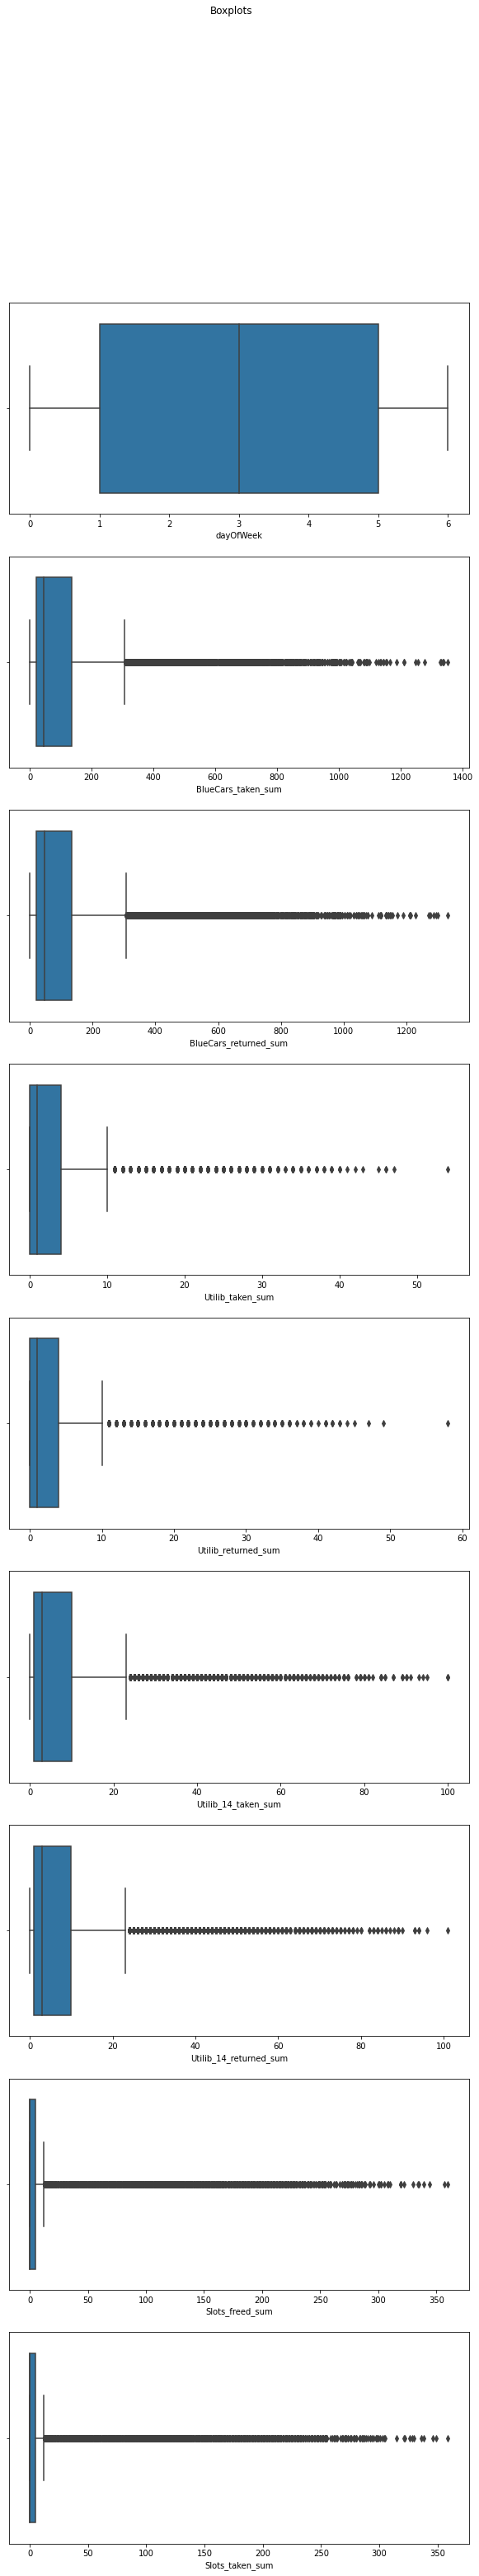

In [26]:
fig, (a1,a2,a3,a4,a5,a6,a7,a8,a9) = plt.subplots(9,1, figsize=(10,50),)
fig.suptitle('Boxplots')
sns.boxplot(autolib['dayOfWeek'], ax=a1,orient='v')
sns.boxplot(autolib['BlueCars_taken_sum'], ax=a2,orient='v')
sns.boxplot(autolib['BlueCars_returned_sum'], ax=a3,orient='v')
sns.boxplot(autolib['Utilib_taken_sum'], ax=a4,orient='v')
sns.boxplot(autolib['Utilib_returned_sum'], ax=a5,orient='v')
sns.boxplot(autolib['Utilib_14_taken_sum'], ax=a6,orient='v')
sns.boxplot(autolib['Utilib_14_returned_sum'], ax=a7,orient='v')
sns.boxplot(autolib['Slots_freed_sum'], ax=a8,orient='v')
sns.boxplot(autolib['Slots_taken_sum'], ax=a9,orient='v')
plt.show()

In [27]:
def outs(x):
  global autolib,a
  
  p1,p3=np.percentile(a[x],[25,75])
  iqr=p3-p1
  l_bound=p1-(1.5*iqr)
  u_bound=p3+(1.5*iqr)
  a=a[~((a[x]<l_bound)|(a[x]>u_bound))]

In [28]:
autolib.shape

(16085, 14)

In [29]:
a=autolib.copy()
outs('BlueCars_taken_sum')
outs('BlueCars_returned_sum')
outs('Utilib_taken_sum')
outs('Utilib_returned_sum')
outs('Utilib_14_taken_sum')
outs('Utilib_14_returned_sum')
outs('Slots_freed_sum')
outs('Slots_taken_sum')
a.shape

(8816, 14)

> the outliers are too many to remove (close to half the dataset)since the analysis would end up being incorrect

####External validation

Paris postal codes run from 75000 to 75991 obtained from https://worldpostalcode.com/france/ile-de-france/paris

California postal codes run from 90001 to 96162 obtained from https://www.zip-codes.com/state/ca.asp

This data was collected from two different regions

In [30]:
autolib['city']=0

In [31]:
autolib['city'][autolib['Postal code']<80000]='paris'
autolib['city'][autolib['Postal code']>80000]='california'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Analysis

####Univariate analysis

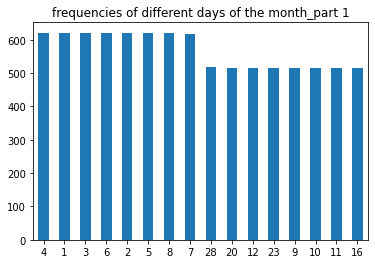

In [247]:
autolib['day'].value_counts().head(16).plot(kind='bar',rot=0,title='frequencies of different days of the month_part 1')


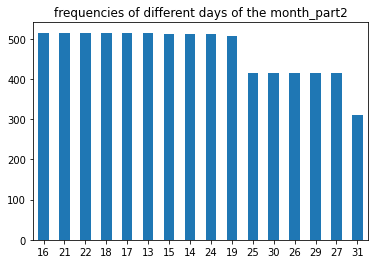

In [248]:
autolib['day'].value_counts().tail(16).plot(kind='bar',rot=0,title='frequencies of different days of the month_part2')

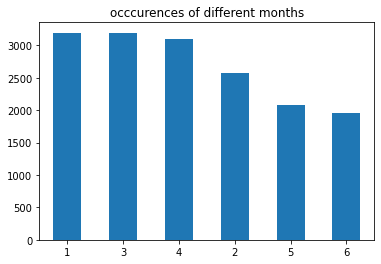

In [244]:
autolib['month'].value_counts().plot(kind='bar',rot=0,title='frequency of different months')

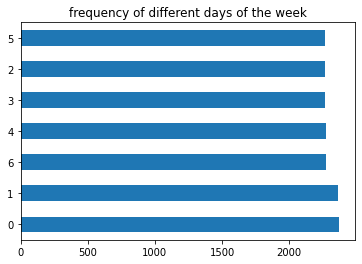

In [251]:
autolib['dayOfWeek'].value_counts().plot(kind='barh',rot=0,title='frequency of different days of the week')

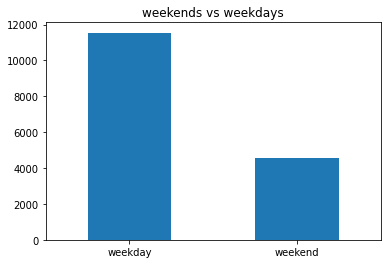

In [245]:
autolib['day_type'].value_counts().plot(kind='bar',rot=0,title='weekends vs weekdays')

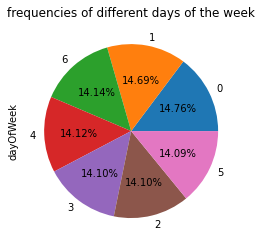

In [249]:
autolib['dayOfWeek'].value_counts().plot(kind='pie',rot=0,autopct='%0.2f%%',title='frequencies of different days of the week')

####bivariate analysis

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
heatmp=autolib.copy()
heatmp['day_type']=le.fit_transform(autolib['day_type'])

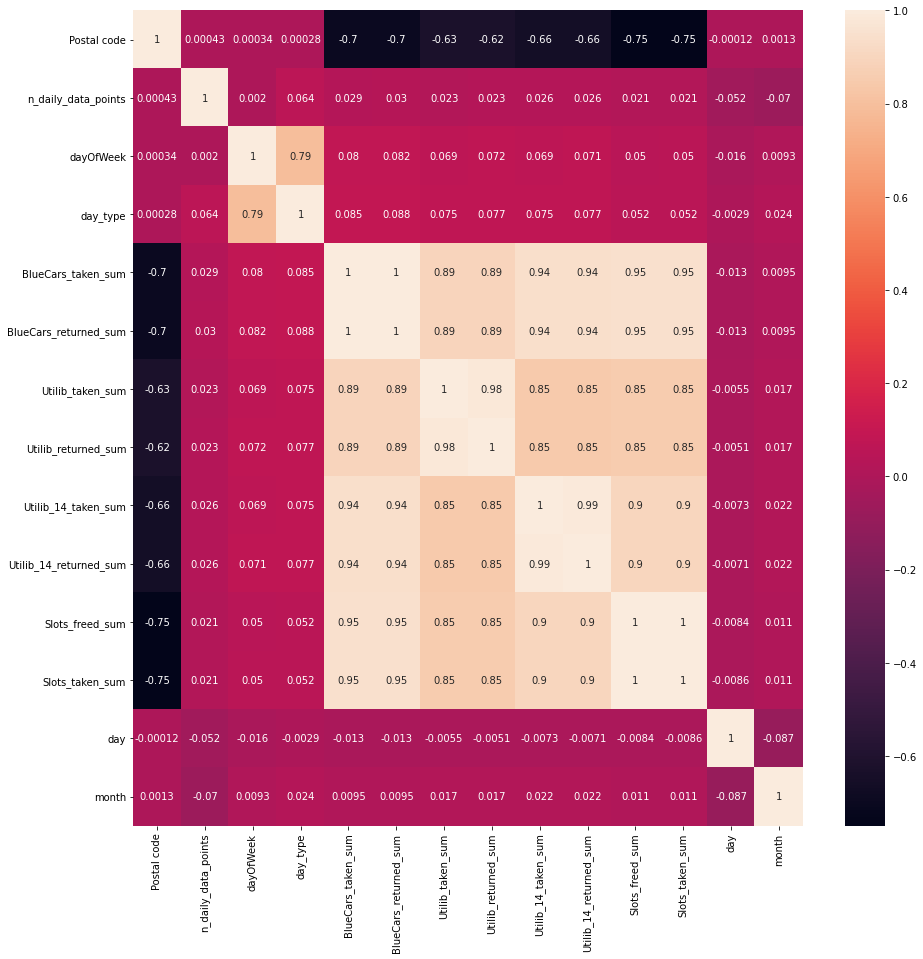

In [38]:
plt.subplots(figsize=(15,15))
sns.heatmap(heatmp.corr(),annot=True)

Cars being taken and returned, and slots freed and taken have a high positive correlation

In [39]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   n_daily_data_points     16085 non-null  int64 
 2   dayOfWeek               16085 non-null  int64 
 3   day_type                16085 non-null  object
 4   BlueCars_taken_sum      16085 non-null  int64 
 5   BlueCars_returned_sum   16085 non-null  int64 
 6   Utilib_taken_sum        16085 non-null  int64 
 7   Utilib_returned_sum     16085 non-null  int64 
 8   Utilib_14_taken_sum     16085 non-null  int64 
 9   Utilib_14_returned_sum  16085 non-null  int64 
 10  Slots_freed_sum         16085 non-null  int64 
 11  Slots_taken_sum         16085 non-null  int64 
 12  day                     16085 non-null  int64 
 13  month                   16085 non-null  int64 
 14  city                    16085 non-null  object
dtypes:

In [40]:
def cars(grouper,others,t):
  cars=autolib[grouper+others]
  car_pivot=pd.pivot_table(cars,index=grouper,values=others,aggfunc='sum')
  #title=f'distribution of {others[0]} and {others[1]} and {others[2]} against {grouper[0]}'
  car_pivot.plot(kind='bar',title=t,rot=0)


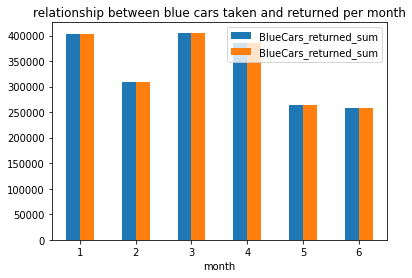

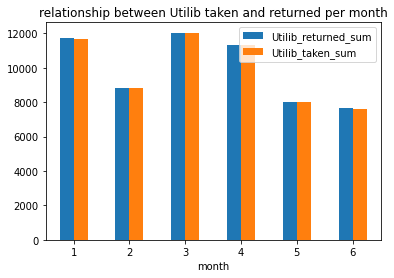

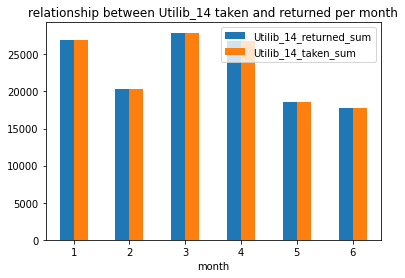

In [41]:
title='relationship between blue cars taken and returned per month'
cars(['month'],['BlueCars_returned_sum','BlueCars_returned_sum'],title)
title='relationship between Utilib taken and returned per month'
cars(['month'],['Utilib_taken_sum','Utilib_returned_sum'],title)
title='relationship between Utilib_14 taken and returned per month'
cars(['month'],['Utilib_14_taken_sum','Utilib_14_returned_sum'],title)

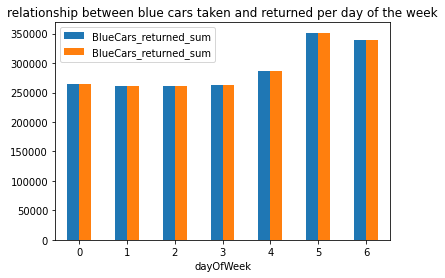

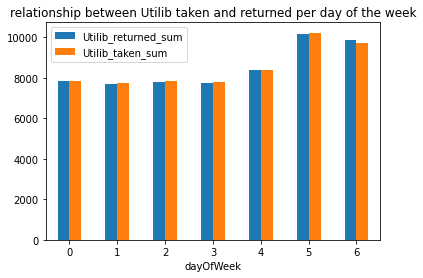

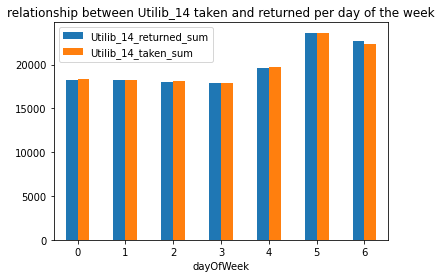

In [42]:
title='relationship between blue cars taken and returned per day of the week'
cars(['dayOfWeek'],['BlueCars_returned_sum','BlueCars_returned_sum'],title)
title='relationship between Utilib taken and returned per day of the week'
cars(['dayOfWeek'],['Utilib_taken_sum','Utilib_returned_sum'],title)
title='relationship between Utilib_14 taken and returned per day of the week'
cars(['dayOfWeek'],['Utilib_14_taken_sum','Utilib_14_returned_sum'],title)

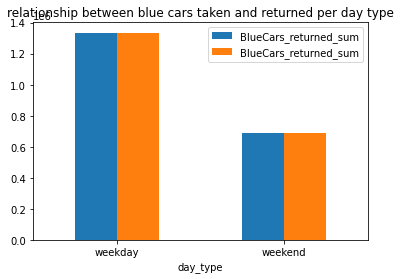

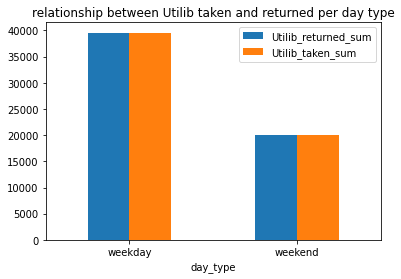

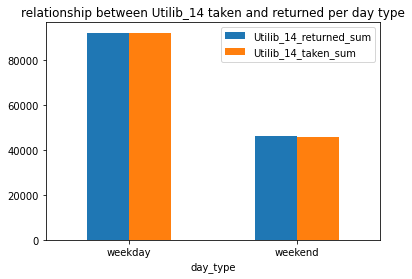

In [43]:
title='relationship between blue cars taken and returned per day type'
cars(['day_type'],['BlueCars_returned_sum','BlueCars_returned_sum'],title)
title='relationship between Utilib taken and returned per day type'
cars(['day_type'],['Utilib_taken_sum','Utilib_returned_sum'],title)
title='relationship between Utilib_14 taken and returned per day type'
cars(['day_type'],['Utilib_14_taken_sum','Utilib_14_returned_sum'],title)

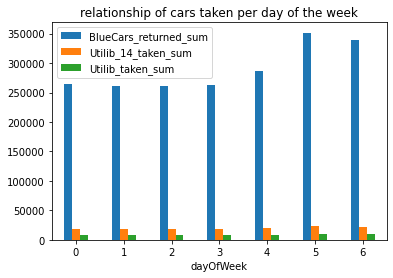

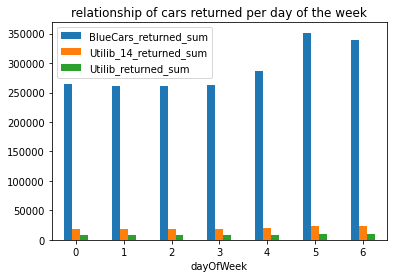

In [44]:
title='relationship of cars taken per day of the week'
cars(['dayOfWeek'],['BlueCars_returned_sum','Utilib_taken_sum','Utilib_14_taken_sum'],title)
title='relationship of cars returned per day of the week'
cars(['dayOfWeek'],['BlueCars_returned_sum','Utilib_returned_sum','Utilib_14_returned_sum'],title)

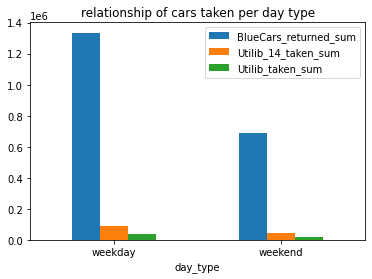

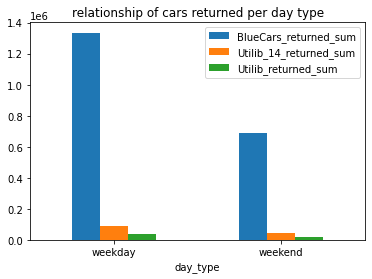

In [45]:
title='relationship of cars taken per day type'
cars(['day_type'],['BlueCars_returned_sum','Utilib_taken_sum','Utilib_14_taken_sum'],title)
title='relationship of cars returned per day type'
cars(['day_type'],['BlueCars_returned_sum','Utilib_returned_sum','Utilib_14_returned_sum'],title)

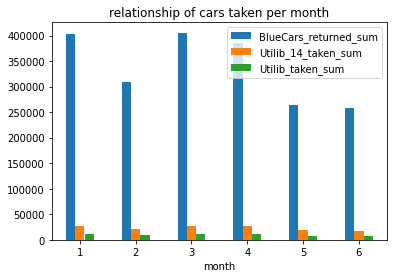

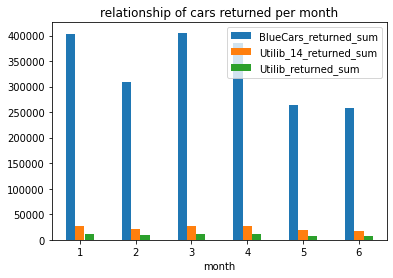

In [46]:
title='relationship of cars taken per month'
cars(['month'],['BlueCars_returned_sum','Utilib_taken_sum','Utilib_14_taken_sum'],title)
title='relationship of cars returned per month'
cars(['month'],['BlueCars_returned_sum','Utilib_returned_sum','Utilib_14_returned_sum'],title)

### Implementing the solution

> Ho: There is no difference in the number of blue cars takenfrom Paris and California.

> Hi: There is a difference in the number of blue cars taken from Paris and California.

significance level =0.05

Simple random sampling to get the month for the test

In [123]:
import random

In [168]:
lst=autolib['month'].unique()
lst=lst.tolist()
mnth=random.sample(lst, k=1)
mnth

[1]

In [169]:
paris=autolib[['city','BlueCars_taken_sum']][(autolib['city']=='paris')&(autolib['month']==mnth[0])]
calif=autolib[['city','BlueCars_taken_sum']][(autolib['city']=='california')&(autolib['month']==mnth[0])]

####Checking if the data is normally distributed

In [170]:
from scipy.stats import shapiro 

def chk(df):
  stat, p = shapiro(df)
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian')
  else:
    print('Sample does not look Gaussian')

In [171]:
chk(paris['BlueCars_taken_sum'])

Sample does not look Gaussian


In [172]:
chk(calif['BlueCars_taken_sum'])

Sample does not look Gaussian


Our test is dependent on a normal distribution hence need for a box-cox transformation to transform the data into normaly distributed data

In [173]:
from scipy.special import boxcox1p
for i in range(-20,20):
  stat, p = shapiro(boxcox1p(paris['BlueCars_taken_sum'],i))
  alpha = 0.05
  if p > alpha:
    print(i,'Sample looks Gaussian')

-20 Sample looks Gaussian
-19 Sample looks Gaussian
-18 Sample looks Gaussian
-17 Sample looks Gaussian
-16 Sample looks Gaussian
-15 Sample looks Gaussian
-14 Sample looks Gaussian
13 Sample looks Gaussian
14 Sample looks Gaussian
15 Sample looks Gaussian
16 Sample looks Gaussian
17 Sample looks Gaussian
18 Sample looks Gaussian
19 Sample looks Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [174]:
for i in range(-20,20):
  stat, p = shapiro(boxcox1p(calif['BlueCars_taken_sum'],i))
  alpha = 0.05
  if p > alpha:
    print(i,'Sample looks Gaussian')

15 Sample looks Gaussian
16 Sample looks Gaussian
17 Sample looks Gaussian
18 Sample looks Gaussian
19 Sample looks Gaussian


I chose to transform them by the same factor where they wer both normally distributed

In [175]:
paris['BlueCars_taken_sum']=boxcox1p(paris['BlueCars_taken_sum'],15)
chk(paris['BlueCars_taken_sum'])

Sample looks Gaussian


In [176]:
calif['BlueCars_taken_sum']=boxcox1p(calif['BlueCars_taken_sum'],15)
chk(calif['BlueCars_taken_sum'])

Sample looks Gaussian


####Calculating the mean,standard deviation and kurtosis

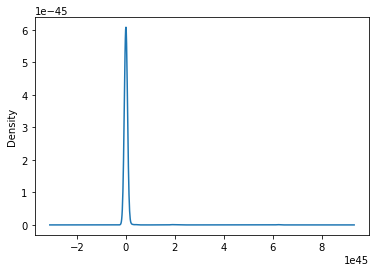

In [177]:
paris['BlueCars_taken_sum'].plot(kind='density')

In [178]:
paris['BlueCars_taken_sum'].kurt()

540.9726629666744

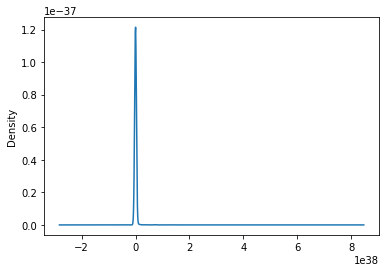

In [179]:
calif['BlueCars_taken_sum'].plot(kind='density')

In [180]:
calif['BlueCars_taken_sum'].kurt()

1078.8693479893184

####clustering

In order to reflect the ration between the blue cars taken in paris and california stratified sampling is the best option

In [181]:
cities=pd.concat([paris,calif])
cities

,city,BlueCars_taken_sum
0,paris,3.189726e+29
1,paris,5.733722e+28
2,paris,9.313882e+30
3,paris,1.385952e+29
4,paris,5.424708e+29
...,...,...
15955,california,1.118173e+20
15956,california,1.969542e+20
15957,california,3.134567e+10
15958,california,7.158279e+07


In [182]:
total=cities['city'].count()

In [183]:
par=round((paris['city'].count())/(total/100),2)
cal=round((calif['city'].count())/(total/100),2)
print('paris percentage:\t',par,'\nCalifornia percentage: ',cal)

paris percentage:	 24.26 
California percentage:  75.74


In [239]:
stratified = cities.groupby('city', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
print(stratified['city'].value_counts())

california    242
paris          78
Name: city, dtype: int64


In [240]:
s_par=stratified[stratified['city']=='paris']
s_cal=stratified[stratified['city']=='california']

In [241]:
chk(s_cal['BlueCars_taken_sum'])

Sample looks Gaussian


In [242]:
chk(s_cal['BlueCars_taken_sum'])

Sample looks Gaussian


#### Two-sample t-test

In [283]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=s_par['BlueCars_taken_sum'], b=s_cal['BlueCars_taken_sum'])


Ttest_indResult(statistic=2.1520392763081206, pvalue=0.032146677638394676)

In [312]:
crit=stats.norm.ppf(0.95)
crit

1.6448536269514722

T statistic =2.15

p-value=0.0321

Since the t statistic=2.15 is higher than the critical value 1.64 at 95% confidence level for this test we reject Ho  and accept Hi.
> Hence conclude that there is a difference in the number of blue cars picked up in callifornia and Paris.

#### Confidence interval

In [302]:
n1=len(s_par['BlueCars_taken_sum'])
n2=len(s_cal['BlueCars_taken_sum'])
n=n1-n2
print('the point estimate of n1-n2 is',n)

the point estimate of n1-n2 is -164


Calculating combined mean and standard deviation

In [307]:
u1=s_par['BlueCars_taken_sum'].mean()
u2=s_cal['BlueCars_taken_sum'].mean()

u=(n1*u1+n2*u2)/(n1+n2)

v1=s_par['BlueCars_taken_sum'].var()
v2=s_cal['BlueCars_taken_sum'].var()
s1= v1+((u1-u)**2)
s2= v2+((u2-u)**2)
v=(s1*n1+n2*s2)/(n1+n2)
S=math.sqrt(v)

In [ ]:
calculating confidence level

In [313]:
m_of_error =crit * (S / math.sqrt(n1+n2))
confidence_interval = (u - m_of_error, u + m_of_error)
print('confidence level range is',confidence_interval)

confidence level range is (-3.778671665752602e+41, 2.4746163135172328e+42)


###Power of the test

In [254]:
pip install statsmodels

calculating the effect size 

In [279]:
import math
sd=math.sqrt((s_par['BlueCars_taken_sum'].var()+ s_cal['BlueCars_taken_sum'].var()/2))
d=(s_par['BlueCars_taken_sum'].mean()-s_cal['BlueCars_taken_sum'].mean())/sd
d

0.13788023047368367

In [295]:
from statsmodels.stats.power import tt_ind_solve_power
power=tt_ind_solve_power(effect_size=d, nobs1=78, alpha=0.05, ratio=242/78)
print('power of the test =',round(power*100,2),'%')

power of the test = 18.42 %
